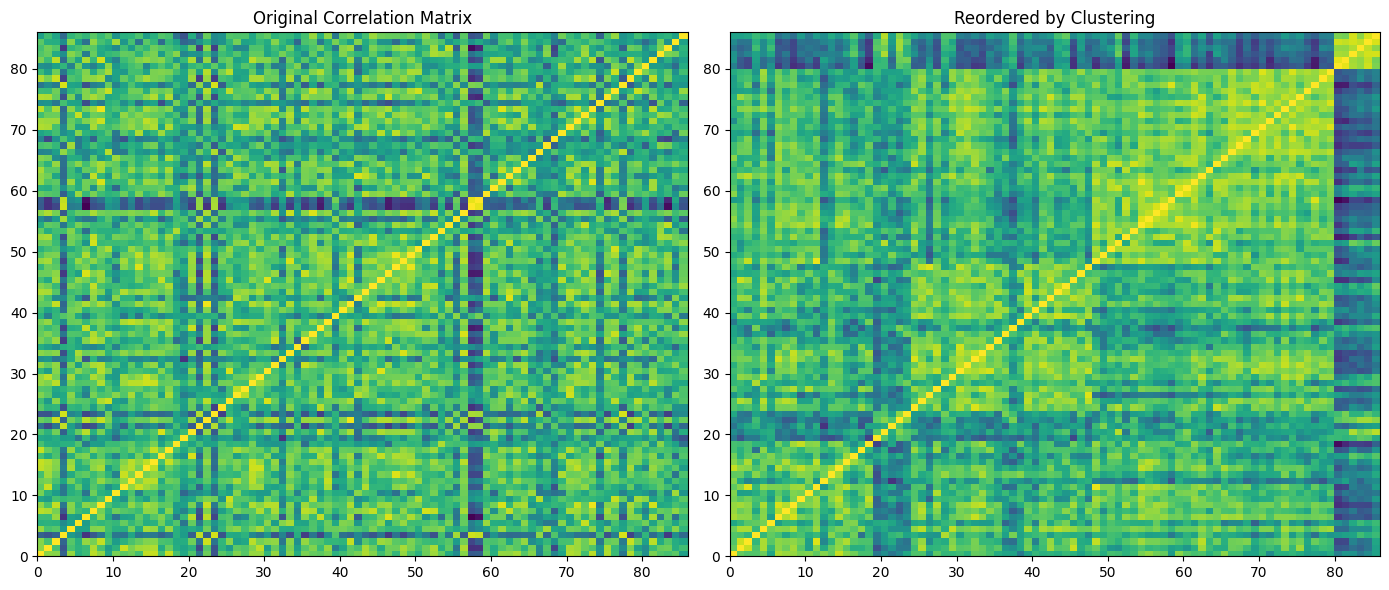

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")
from sklearn.cluster import SpectralCoclustering
# Load data
whisky = pd.read_csv("data/whiskies.txt")
regions = pd.read_csv("data/regions.txt", header=None)
whisky["Region"] = regions
flavors = whisky.iloc[:, 2:14]

# Original correlation matrix
corr_whisky = pd.DataFrame.corr(flavors.transpose())

# Fit clustering model
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)

# Assign labels and reorder
whisky["Group"] = model.row_labels_
whisky_sorted = whisky.iloc[np.argsort(model.row_labels_)].reset_index(drop=True)

# Correlation after clustering
reordered_corr = pd.DataFrame.corr(
    whisky_sorted.iloc[:, 2:14].transpose()
)

# Plot side-by-side heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pcolor(corr_whisky)
plt.title("Original Correlation Matrix")
plt.axis("tight")

plt.subplot(1, 2, 2)
plt.pcolor(reordered_corr)
plt.title("Reordered by Clustering")
plt.axis("tight")

plt.tight_layout()
plt.savefig("outputs/original_vs_clustered_correlation.png")
plt.show()
